# Identificación de sistemas por medio de la curva de reacción (respuesta al escalón).


En esta práctica vamos a obtener el modelo por curva de reacción y el modelo estático para un sistema térmico. También lo haremos para un motor DC considerando como salida la velocidad. Usaremos para ello las plantas diseñadas en la universidad denominadoss UNThermal y UNDCMotor.

+ El UNThermal es un minilaboratorio que permite realizar el control de temperatura de un par transistor-sensor mediante la administración precisa de potencia eléctrica controlada por una fuente de corriente analógica. 

+ El UNDCMotor es un minilaboratorio que permite realizar el control de velocidad y ángulo de giro de un motor DC.


## Configuración
---


### Instalación de las librerias unthermal y unmotor

Ejecutar esta celda solo para instalar por primera vez o actualizar la libreria. __Asegúrese de instalar  [Git](https://git-scm.com/download/win/ "Git").__

<div class="alert alert-block alert-danger">
⚠️ Ejecutar en el terminal solo  para instalar la libreria 
</div>



Ejecute los siguientes comandos en la terminal (bash) de visual studio code solo para instalar o reinstalar las librerias del motor y del sistema térmico. __Asegúrese de instalar  [Git](https://git-scm.com/download/win/ "Git").__

`pip install --ignore-installed  git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code`

`pip install --ignore-installed  git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code`


Si la instalación reporta algún error de permisos del sistema operativo, use esta opción:


`pip install --ignore-installed --user git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code`

`pip install --ignore-installed --user git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code`


### Importación de comandos de la libreria unthermal y unmotor

A continuación importamos los comandos básicos que usaremos de la libreria `unthermal` y la libreria `matplotlib` para las figuras.

In [2]:
%matplotlib widget
import mplcursors
import matplotlib.pyplot as plt
import unthermal as temp
import numpy as np
import unmotor as mot


---


### Definición del sistema en el IoT

En este enlace encuentra toda la ayuda de las funciones  [enlace de la ayuda](https://nebisman.github.io/UNThermal/)

Lo primero que necesitamos es definir el sistema y su conexión al IoT. Esto lo hacemos mediante el  comando

`ThermalSystemIoT(plant_number="xxxx", broker_address = "xx.xxx.xxx.xxx")`.

+ El parámetro `plant_number` es el identificador de la planta con que está trabajando. Por ejemplo `plant_number="PC-T-XX"`

+ El parámetro `broker_address` es la dirección IP del broker al cual se conecta la planta. Poner siempre ` broker_address = "192.168.1.100"` 

In [2]:
sistema_termico = temp.ThermalSystemIoT(plant_number = "PC-T-18" , broker_address = "192.168.1.100")

## Modelos estático y dinámico del sistema térmico
---

A continuación vamos a obtener tanto el modelo estático, como el modelo dinámico por respuesta al escalón del sistema térmico

### Modelo estático del sistema térmico

Es natural comenzar investigando el comportamiento estacionario de un sistema bajo
control. Esto se hace mediante una curva que muestra el valor en estado estacionario de la
salida (en este caso, la temperatura del par transistor-sensor) para diferentes valores de la variable de entrada (en este caso la potencia aplicada). A esta curva se le denomina Modelo Estático del Sistema.


El modelo estático se puede obtener experimentalmente de varias formas. *Una manera
es que el sistema esté en lazo cerrado con un controlador preajustado e ir ajustando diferentes valores de la referencia. Cuando la salida (en este caso la temperatura) alcanza el valor estacionario de referencia, se registra la señal de control que fue necesaria. Esto da un punto del modelo estático. Este procedimiento se repite para cubrir el rango completo de entradas.*



+ La  función `get_static_model(system)` nos permite obtener el modelo estático del UNThermal definido por la instancia del UNThermal creada con la función  `ThermalSystemIoT(.)`
+ La funcion `plt.savefig(.)` permite guardar la figura en en cualquier formato para su video informe
+ `plt.show` hace que su figura se guarde al guardar y cerrar el notebook.


*Note que la salida los valores de estado estacionario de la entrada y la salida quedan registrados en las variables `ue`, `ye`. También quedan guardados en el archivo `\experiment_files\DCmotor_static_gain_response.csv` presente en la carpeta en la que ejecuta este script.*




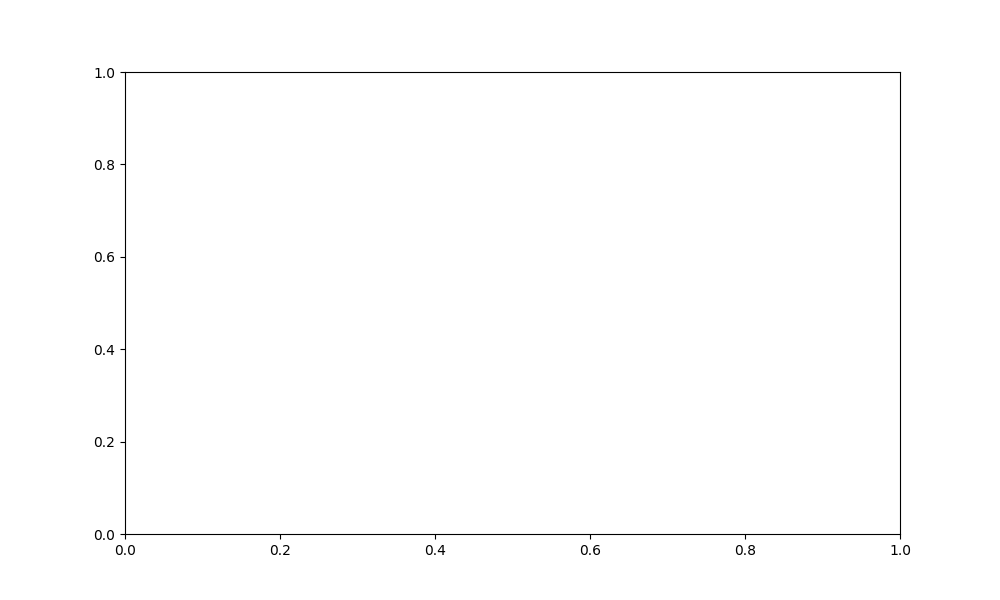

Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  1   (2,)
Command send:  2
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  3   (2,)
Command send:  4
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  5   (2,)
Command send:  6
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  7   (2,)
Command send:  8
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  9   (2,)
Command send:  10
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  11   (2,)
Command send:  12
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  13   (2,)
Command send:  14
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  15   (2,)
Command send:  16
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  17   (2,)
Command send:  18
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  19   (2,)
Command send:  20
Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  21   (2,)
Comm

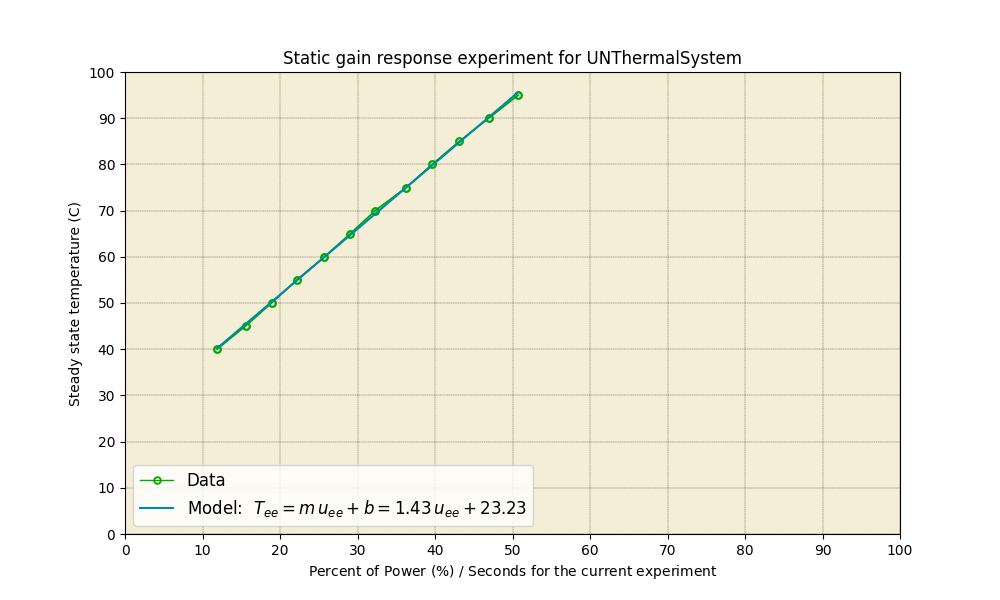

In [3]:
ue, ye = temp.get_static_model(sistema_termico) 
plt.savefig("static_model.pdf", format="pdf", bbox_inches="tight") # la figura se guarda en el archivo que ud desee
plt.show() # esta linea es para que la figura se mantenga al guardar el notebook

### Preguntas orientadoras sobre el modelo estático

Por favor discuta las preguntas con su compañero inmediatamente durante la práctica y respondalas en su videoinforme 

1.  Considere que el rango de operación va desde  $40^oC$ hasta $100^oC$. ¿Existen temperaturas en este rango más dificiles de controlar, según el modelo estático?
2.  Suponga que un modelo aproximado del sistema térmico está dado por $G(s)=\frac{\alpha}{\tau\,s+1}\, e^{-sL}$. ¿Cual de los parámetros ($\alpha$ o $\tau$) podriamos asumir como aproximadamente constante, según la curva del modelo estático?
3.  ¿Cual es la señal de control necesaria para controlar una temperatura cercana a $70^oC$? ¿Cuanta energía queda disponible para compensar una perturbación fria que llega al sistema térmico?



### Modelo dinámico por respuesta al escalón

Cuando se realiza la linealización del modelo del UNThermal se obtiene un  modelo lineal de primer orden, tal y como puede revisar en este [documento](https://github.com/nebisman/UNThermal/blob/main/docs/modelo_matematico_unthermal.pdf).

Así, nuestro sistema térmico, dentro de una región cercana al punto de operación, puede ser descrito por la siguiente función de transferencia:

$$G(s)= \frac{\alpha}{\tau\, s + 1} \, e^{-L\,s}$$

Es usual que la primera prueba de identificación de sistemas que parecen de primer orden sea por la respuesta al escalón. 


### Método de estimación de los parámetros del sistema por la curva de reacción
 
 A continuación usamos el método de 2 puntos para la identificación del modelo de primer orden, según el procedimiento descrito en este [documento](https://github.com/nebisman/UNThermal/blob/main/docs/metodo_2_puntos.pdf). 


 Para iniciar hacemos el experimento de respuesta al escalón, usando el comando `step_open`, [descrito en este enlace](https://nebisman.github.io/UNThermal/step_open.html). Con este comando obtenemos la respuesta al escalón, partiendo del punto de operación $y_{OP}=70^o$ y con una amplitud del cambio en el escalón $\Delta_u=10 \%$

Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  25   (2,)
Command send:  26


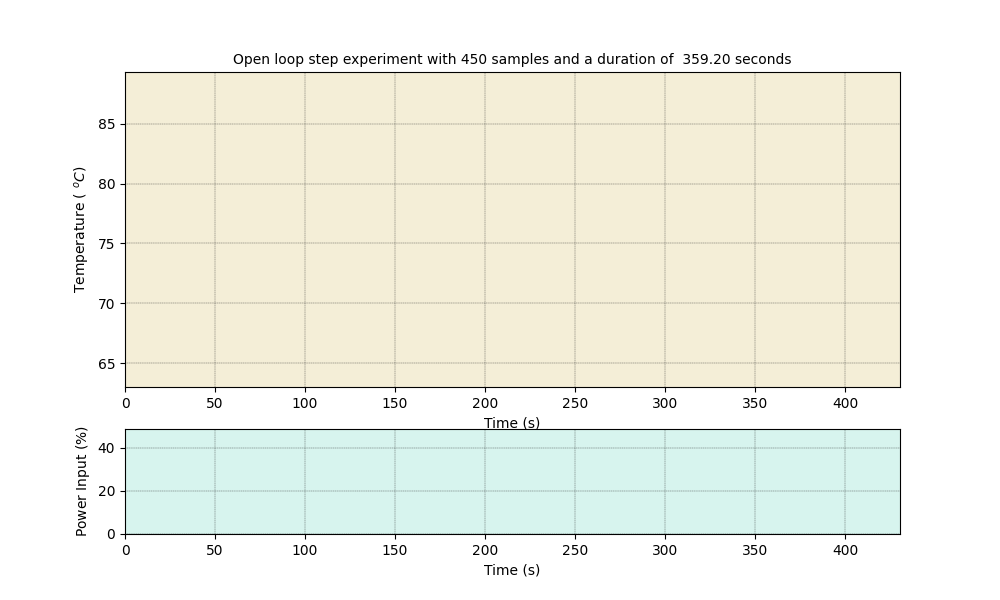

In [4]:
# inicialmente hacemos el experimento de respuesta al escalón para 70 grados
t, u, y = temp.step_open(sistema_termico, yop=70, amplitude=10);

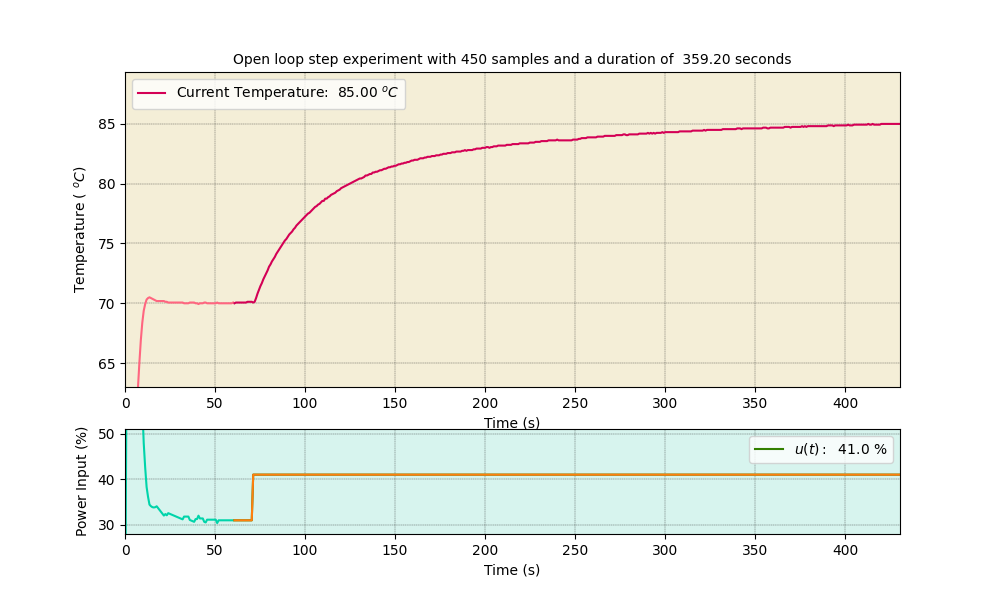

In [5]:
# Asi grafico los datos de la salida y de la entrada
plt.plot(t,y)
plt.plot(t,u)
plt.show()

### Trabajo experimental con el sistema térmico

+ Con los datos obtenidos en los vectores $t,u,y$ (o graficamente), obtenga el modelo de primer orden con retardo, según los pasos descritos en este [documento](https://github.com/nebisman/UNThermal/blob/main/docs/metodo_2_puntos.pdf). Note que los resultados también se guardan en el archivo `Thermal_step_open_exp.csv` de la carpeta `experiment_files`, por si prefiere hacer los cálculos en otro programa (Julia, Excel, etc).

+ Compare en la misma gráfica el modelo mátemático obtenido con los datos experimentales con los cambios de escala apropiados. Discuta sobre la identificación lograda.

+ Use la función `get_fomodel_step` para verificar al modelo obtendo anteriormente. [Aqui está la ayuda](https://nebisman.github.io/UNThermal/get_fomodel_step.html#)

Successfully connected to MQTT Broker 192.168.1.100
Subscribed:  27   (2,)
Command send:  28


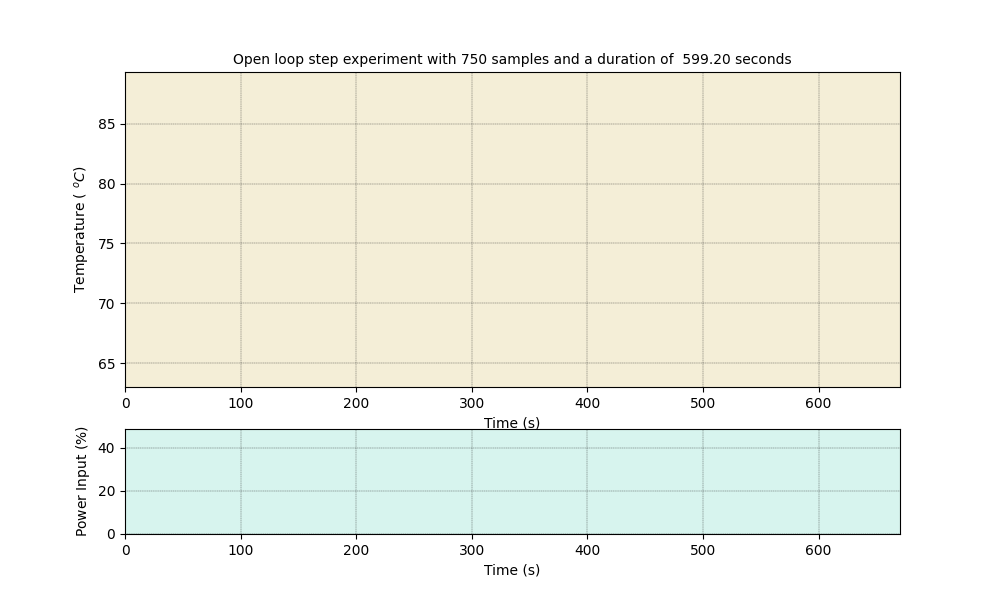

In [6]:
# este es el comando para realizar el experimento y obtener el modelo del sistema térmico
alfa, tau, L = temp.get_fomodel_step(sistema_termico, yop = 70)

#### Preguntas orientadoras 

+ ¿Cuanta energía (en porcentaje) es necesaria para mantener el punto de operación en $70^o$? ¿Coincide con el experimento del modelo estático?

## Modelo estático y dinámico para el Motor DC
___

A continuación vamos a realizar el trabajo de un modelo estático y dinámico para el Motor DC. Para ello. primero definimos la planta como objeto IoT. Esto lo hacemos a continuación:

In [3]:
my_motor = mot.MotorSystemIoT(plant_number = "PC-M-1", broker_address = "192.168.1.100") 

### Modelo estático del Motor DC



El modelo estático se puede obtener experimentalmente de varias formas. *otra manera
habitual es ajustar un valor constante de entrada y medir la salida en estado estacionario.
Esto da un punto del modelo estático. Este procedimiento se repite para cubrir el
rango completo de entradas.*

+ La  función `get_static_model(m)` nos permite obtener el modelo estático del UNDCmotor definido por la instancia del UNDCMotor creada con la función  `MotorSystemIoT(.)`

+ La función `plt.savefig(.)` permite guardar la figura en en cualquier formato.

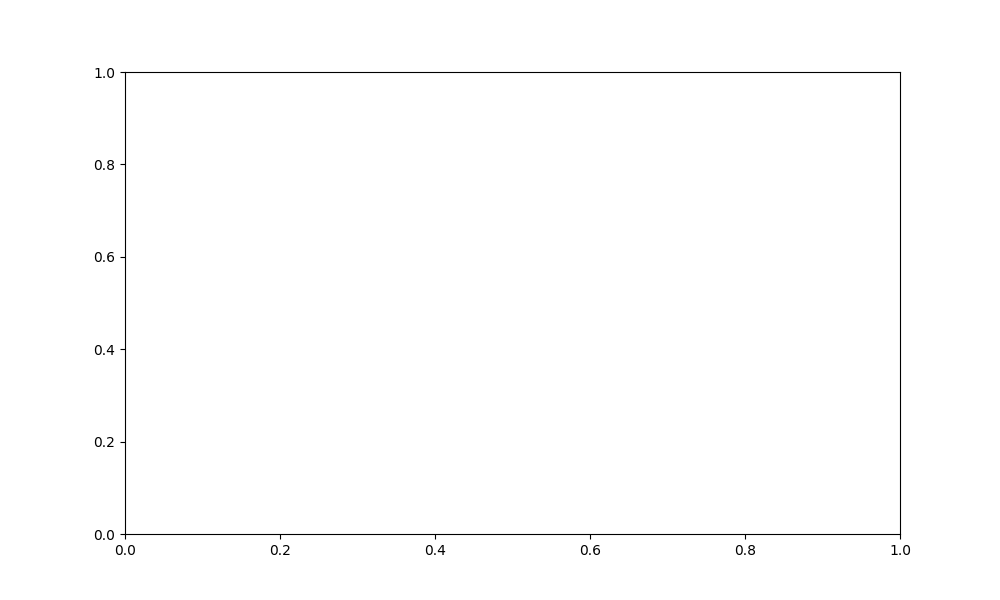

Connected successfully to MQTT Broker!
Subscribed:  1   (2,)
Static model esperiment has been completed


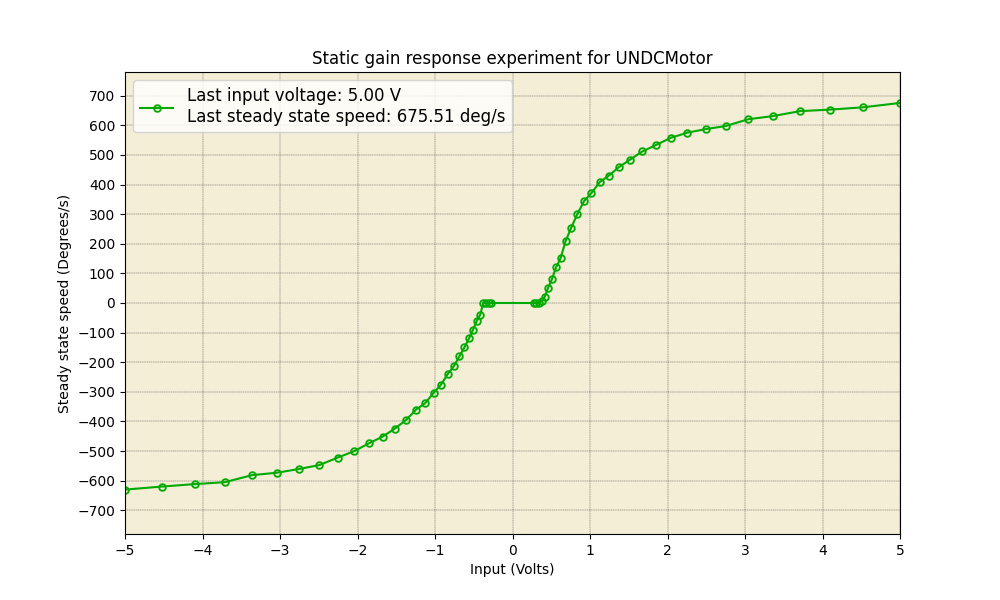

In [4]:
ue, ye = mot.get_static_model(my_motor) 
plt.savefig("static_model.pdf", format="pdf", bbox_inches="tight") # la figura se guarda en el archivo que ud desee
plt.show() # esta linea es para que la figura se mantenga al guardar el notebook

#### Preguntas orientadoras sobre el modelo estático

Discuta estas preguntas con su compañero e incluya una respuesta breve en su video informe.

1.  ¿Cuál es la zona muerta del motor?
2.  ¿Para cuales rangos de velocidad podría ser difícil controlar el motor?
3.  ¿Hasta que velocidad máxima se puede controlar el motor?
4.  Suponga que un modelo aproximado del motor está dado por $G(s)=\frac{\alpha}{\tau\,s+1} e^{-sL}$. ¿Cual de los parámetros ($\alpha$, $L$, o $\tau$) varía ampliamente, según se ve reflejado en la  no linealidad  de la curva del modelo estático? 

### Modelo dinámico por respuesta al escalón 
---

Un motor DC puede ser descrito con muy buena aproximación por un  [modelo lineal de primer orden](https://github.com/nebisman/UNDCMotor/blob/main/docs/modelo_matematico_unmotor.pdf), si consideramos que la entrada es tensión y la salida es la velocidad angular.

Así, el UNDCMotor puede ser descrito por la siguiente función de transferencia:

$$G(s)= \frac{\alpha}{\tau\, s + 1} e^{-sL}$$

*Note que el retardo fundamentalmente aparece por el tiempo de muestreo del sistema digital que procesa la información.*



La función `get_fomodel_step(system, yop = desired_op)`  *(get first order model by using step response)* permite obtener la respuesta al escalón y el modelo matemático del UNDCMotor directamente usando el mismo método que usamos paso a paso en el sistema térmico. [Aqui está la ayuda](https://nebisman.github.io/UNThermal/get_fomodel_step.html#)  

+ El parámetro `system` es la instancia del UNDCMotor creada con la función  `MotorSystemIoT(.)`

+ El parámetro `yop = desired_op` permite obtener la respuesta al escalón con un cambio de tensión que centra, aproximadamente, los valores final e inicial del escalón en el punto de operación `yop`.

+  `alpha, tau` y `L` retornan los parámetros del motor.

En el ejemplo siguiente obtenemos la respuesta al escalón y el modelo para un punto de operación. 

Connected successfully to MQTT Broker!
Subscribed:  92   (2,)


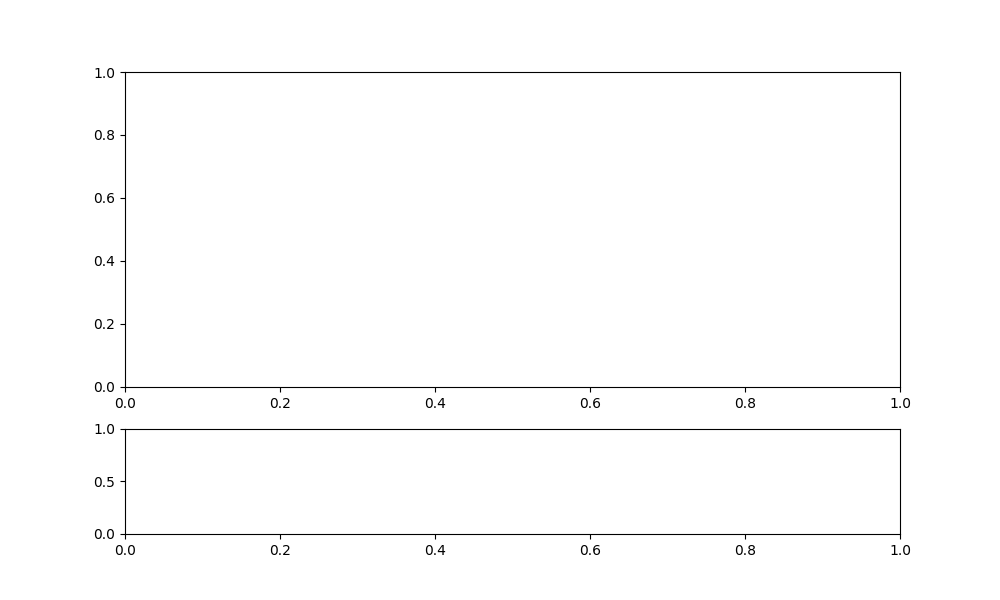

1.97568429 3.84272671
519.9429248056 627.3000537146


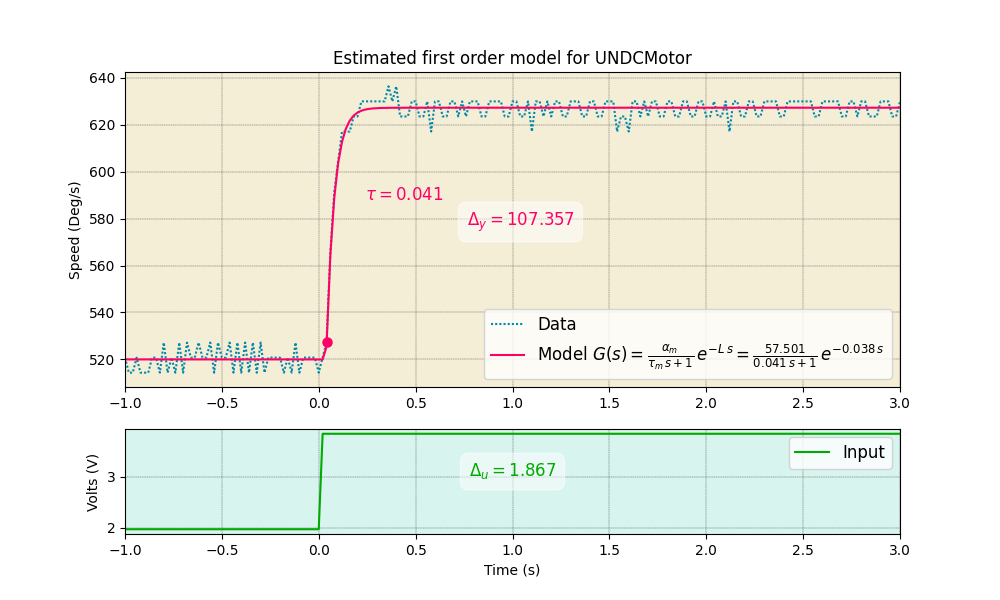

In [20]:
#Ejemplo
alfa, tau, L = mot.get_fomodel_step(my_motor, yop = 600)
plt.savefig("first_order_model_yop_150.pdf", format="pdf", bbox_inches="tight") # para salvar la figura
plt.show() # para congelarla en el notebook




### Trabajo experimental con el motor

Encuentre los modelos dinámicos por respuesta al escalón para los siguientes puntos de operación:

+ $y_{OP}=150^o/s$
+ $y_{OP}=300^o/s$
+ $y_{OP}=600^o/s$

#### Preguntas sobre el modelo por respuesta al escalón

+ Describa como cambia la constante de tiempo $\tau$ al incrementar la velocidad.
+ Discuta que pasaría si se requiere un controlador para garantizar velocidad de $10^o/s$ en este sistema. 
+ Describa como cambia la constante de ganancia $\alpha$ al incrementar la velocidad.
+ Suponga que vamos a controlar el motor en velocidades que van desde $300^o/s$ a $600^o/s$. Realizando múltiples experimentos, obtenga diferentes modelos por curva de reacción que permitan caracterizar la incertidumbre absoluta de los parámetros $\alpha$ y $\tau$.
